In [1]:
# Standard Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

# extras
%matplotlib inline

# import personal modules
# Path to modules
sys.path.append('../../modules')
# Import my modules
from plotter import draw_basemap, add_subregion_boxes, make_cmap
from constants import ucsd_colors

In [2]:
def roundPartial(value, resolution):
    return round(value / resolution) * resolution


def round_latlon_degree(df, res):

    df['lon-round'] = roundPartial(df['longitude'], res)
    df['lat-round'] = roundPartial(df['latitude'], res)
    
    return df

In [3]:
# Set up paths
server = "comet"
if server == "comet":
    path_to_data = '/cw3e/mead/projects/cwp140/scratch/dnash/data/'      # project data -- read only
elif server == "skyriver":
    path_to_data = '/work/dnash/data/'
    
path_to_out  = '../../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../../figs/'      # figures

In [4]:
## open files and round lat and lons
fname_lst = ['../../data/IVT_plume_coastal_AK.txt', 
             '../../data/AR_landfall_coastal_AK.txt',
             '../../data/AR_landfall_inland_AK.txt']

df_lst = []

for i, fname in enumerate(fname_lst):
    df = pd.read_csv(fname, header=0, sep='  ', engine='python')
    df = round_latlon_degree(df, res=0.5)
    df_lst.append(df)

In [5]:
ext2 = [-175., -120., 40., 75.] # extent of AK
ext2 = [-180., -125., 50., 70.] # extent of AK

# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.Mercator() ## the projection you want your map displayed in

# Set tick/grid locations
tx = 10
ty = 5
dx = np.arange(ext2[0],ext2[1]+tx,tx)
dy = np.arange(ext2[2],ext2[3]+ty,ty)

fig = plt.figure(figsize=(9.0 ,9.0))
fig.dpi = 600
fname = path_to_figs + 'AK_map_ARtools'
fmt1 = 'svg'
fmt2='png'

ax = plt.axes(projection=ccrs.Mercator())
ax = draw_basemap(ax, extent=ext2, xticks=dx, yticks=dy,left_lats=True, right_lats=False)
ax.set_extent(ext2, ccrs.PlateCarree())

# need this to fix annotate transform
transform = datacrs._as_mpl_transform(ax)

## Add different points
colors = ['ro', 'go', 'bo']
for i, df in enumerate(df_lst):
    x = df['longitude'].values*-1
    y = df['latitude'].values
    ax.plot(x, y, colors[i], markersize=6, transform=datacrs, alpha=0.5)


fig.savefig('%s.%s' %(fname, fmt1), bbox_inches='tight', dpi=fig.dpi, transparent=True)
fig.savefig('%s.%s' %(fname, fmt2), bbox_inches='tight', dpi=fig.dpi, transparent=True)
plt.show()
fig.clf()



## lat/lons rounded to the nearest quarter degree

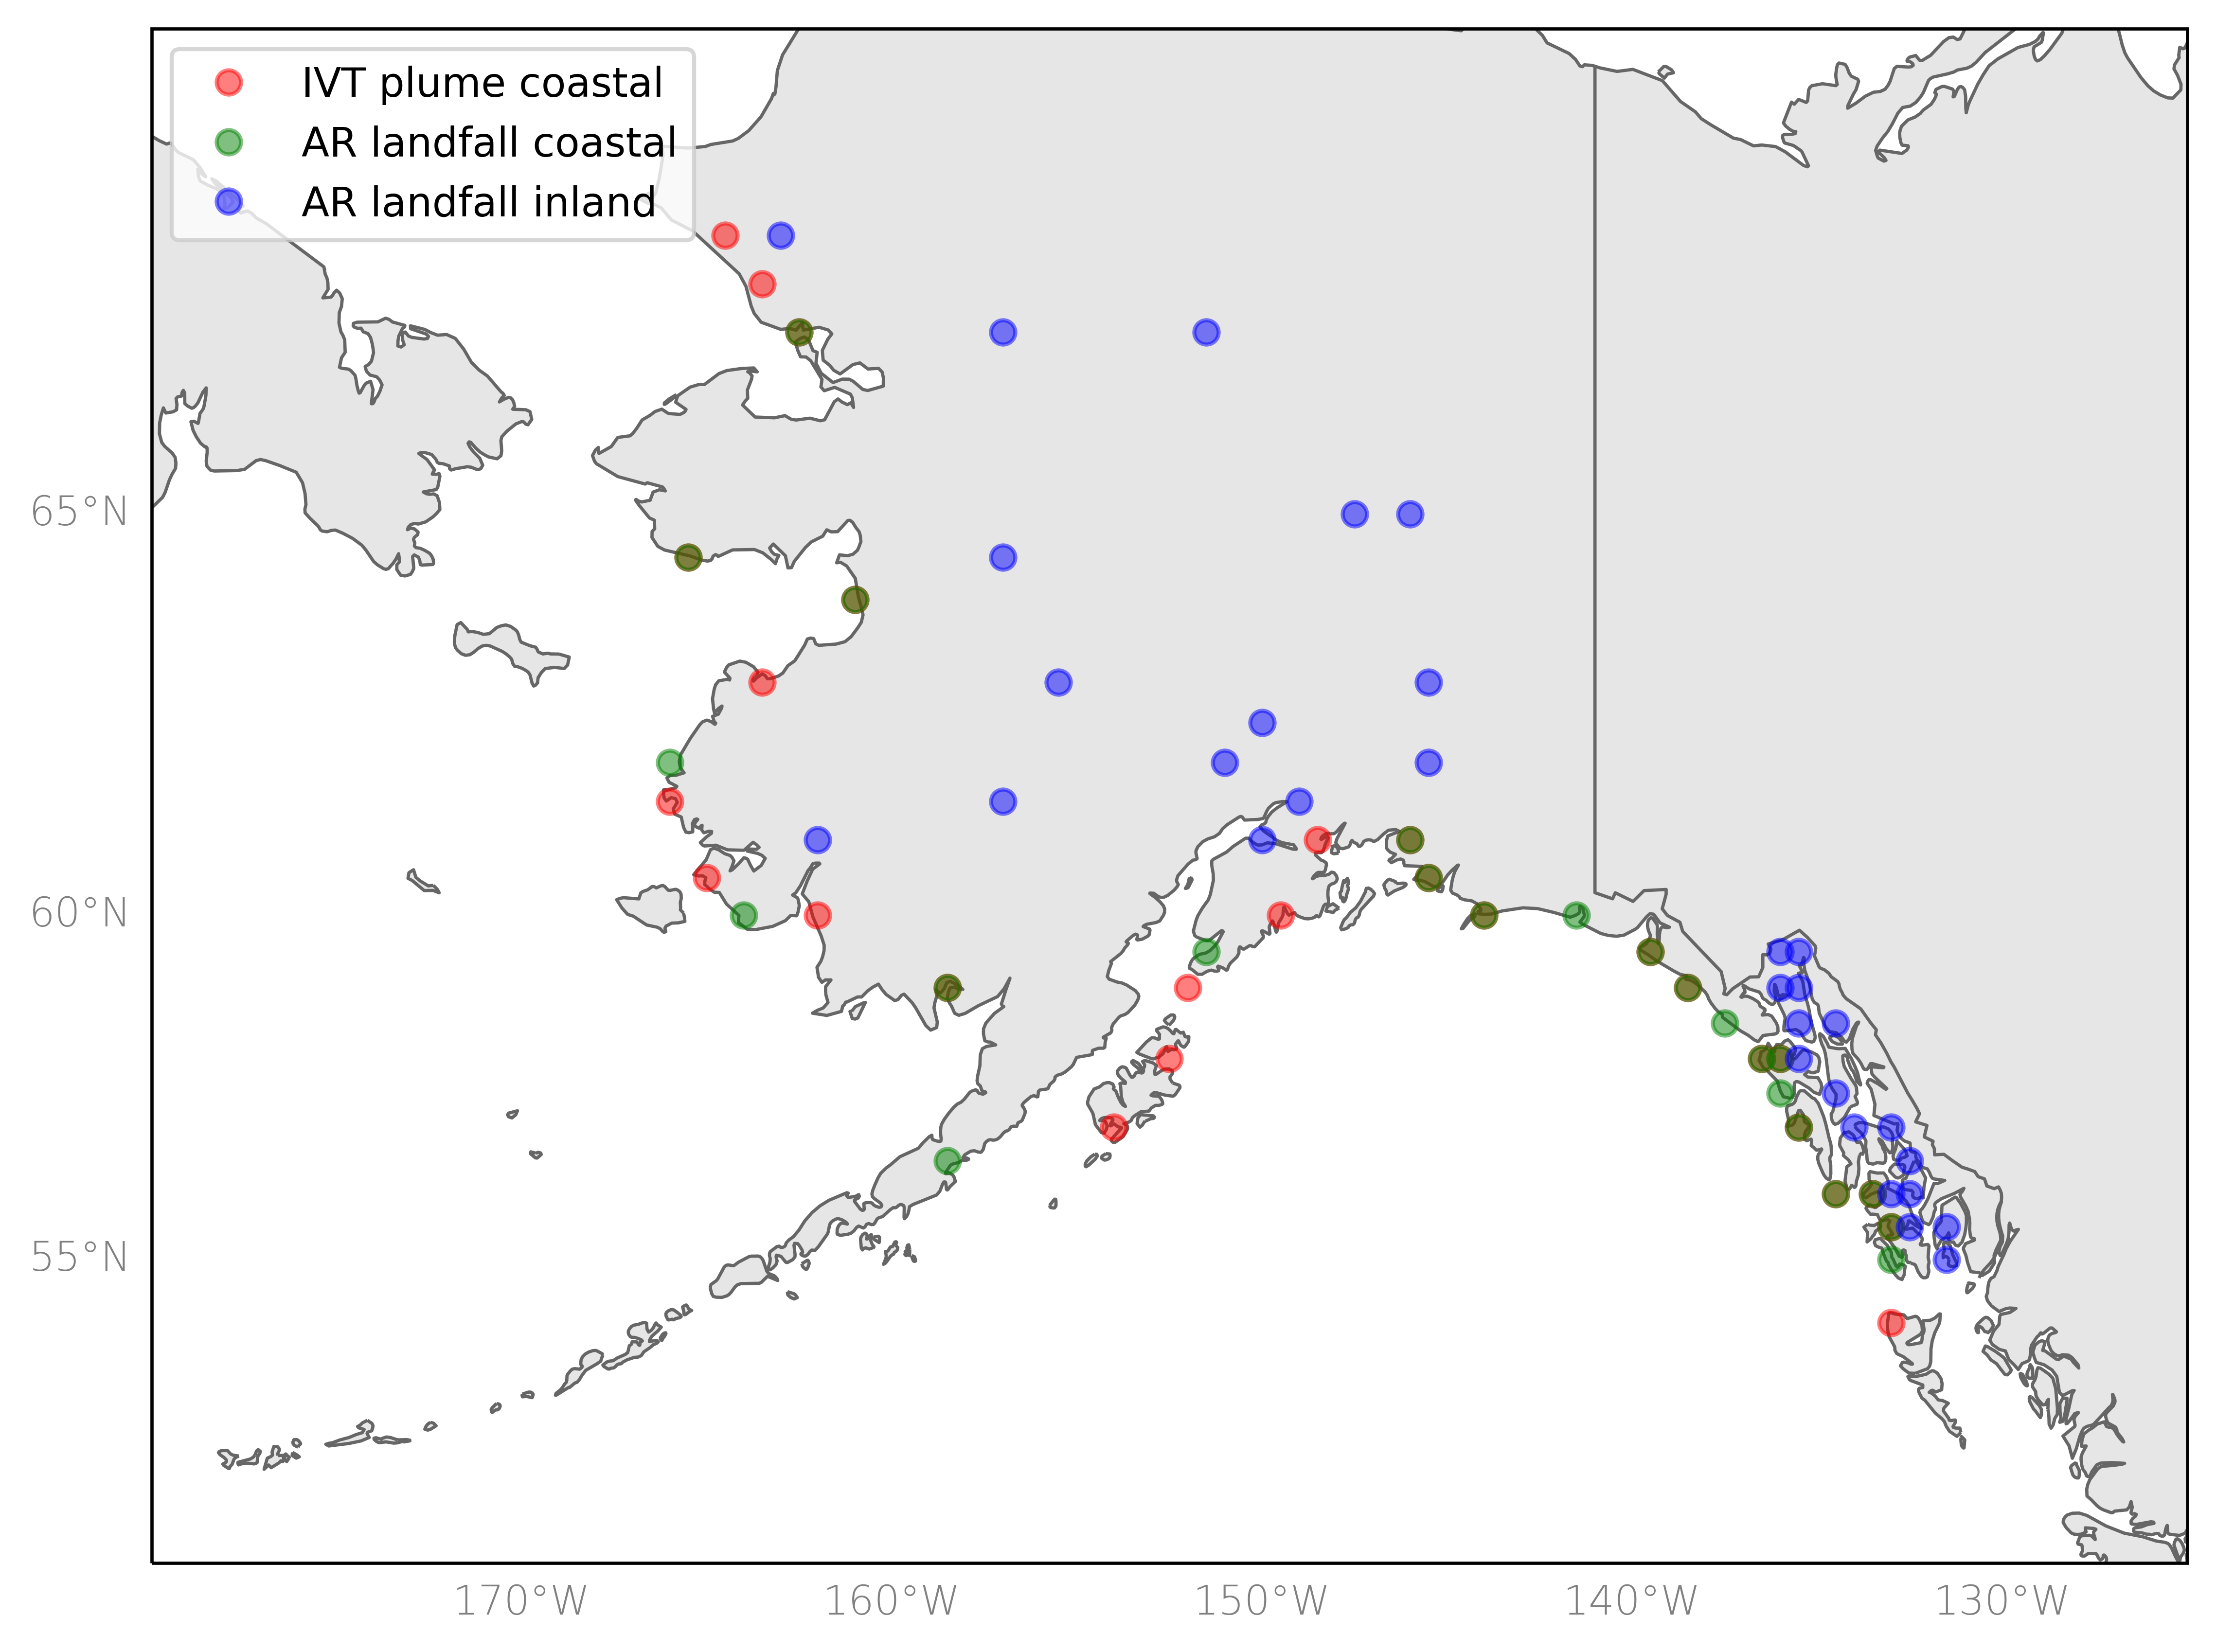

In [6]:
ext2 = [-175., -120., 40., 75.] # extent of AK
ext2 = [-180., -125., 50., 70.] # extent of AK

# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.Mercator() ## the projection you want your map displayed in

# Set tick/grid locations
tx = 10
ty = 5
dx = np.arange(ext2[0],ext2[1]+tx,tx)
dy = np.arange(ext2[2],ext2[3]+ty,ty)

fig = plt.figure(figsize=(9.0 ,9.0))
fig.dpi = 600
fname = path_to_figs + 'AK_map_ARtools'
fmt1 = 'svg'
fmt2='png'

ax = plt.axes(projection=ccrs.Mercator())
ax = draw_basemap(ax, extent=ext2, xticks=dx, yticks=dy,left_lats=True, right_lats=False)
ax.set_extent(ext2, ccrs.PlateCarree())

# need this to fix annotate transform
transform = datacrs._as_mpl_transform(ax)

## Add different points
colors = ['ro', 'go', 'bo']
lbl_lst = ['IVT plume coastal', 'AR landfall coastal', 'AR landfall inland']
for i, df in enumerate(df_lst):
    x = df['lon-round'].values*-1
    y = df['lat-round'].values
    ax.plot(x, y, colors[i], markersize=6, transform=datacrs, alpha=0.5, label=lbl_lst[i])
    
leg = ax.legend(loc='upper left', ncol=1)

fig.savefig('%s.%s' %(fname, fmt1), bbox_inches='tight', dpi=fig.dpi, transparent=True)
fig.savefig('%s.%s' %(fname, fmt2), bbox_inches='tight', dpi=fig.dpi, transparent=True)
plt.show()
fig.clf()



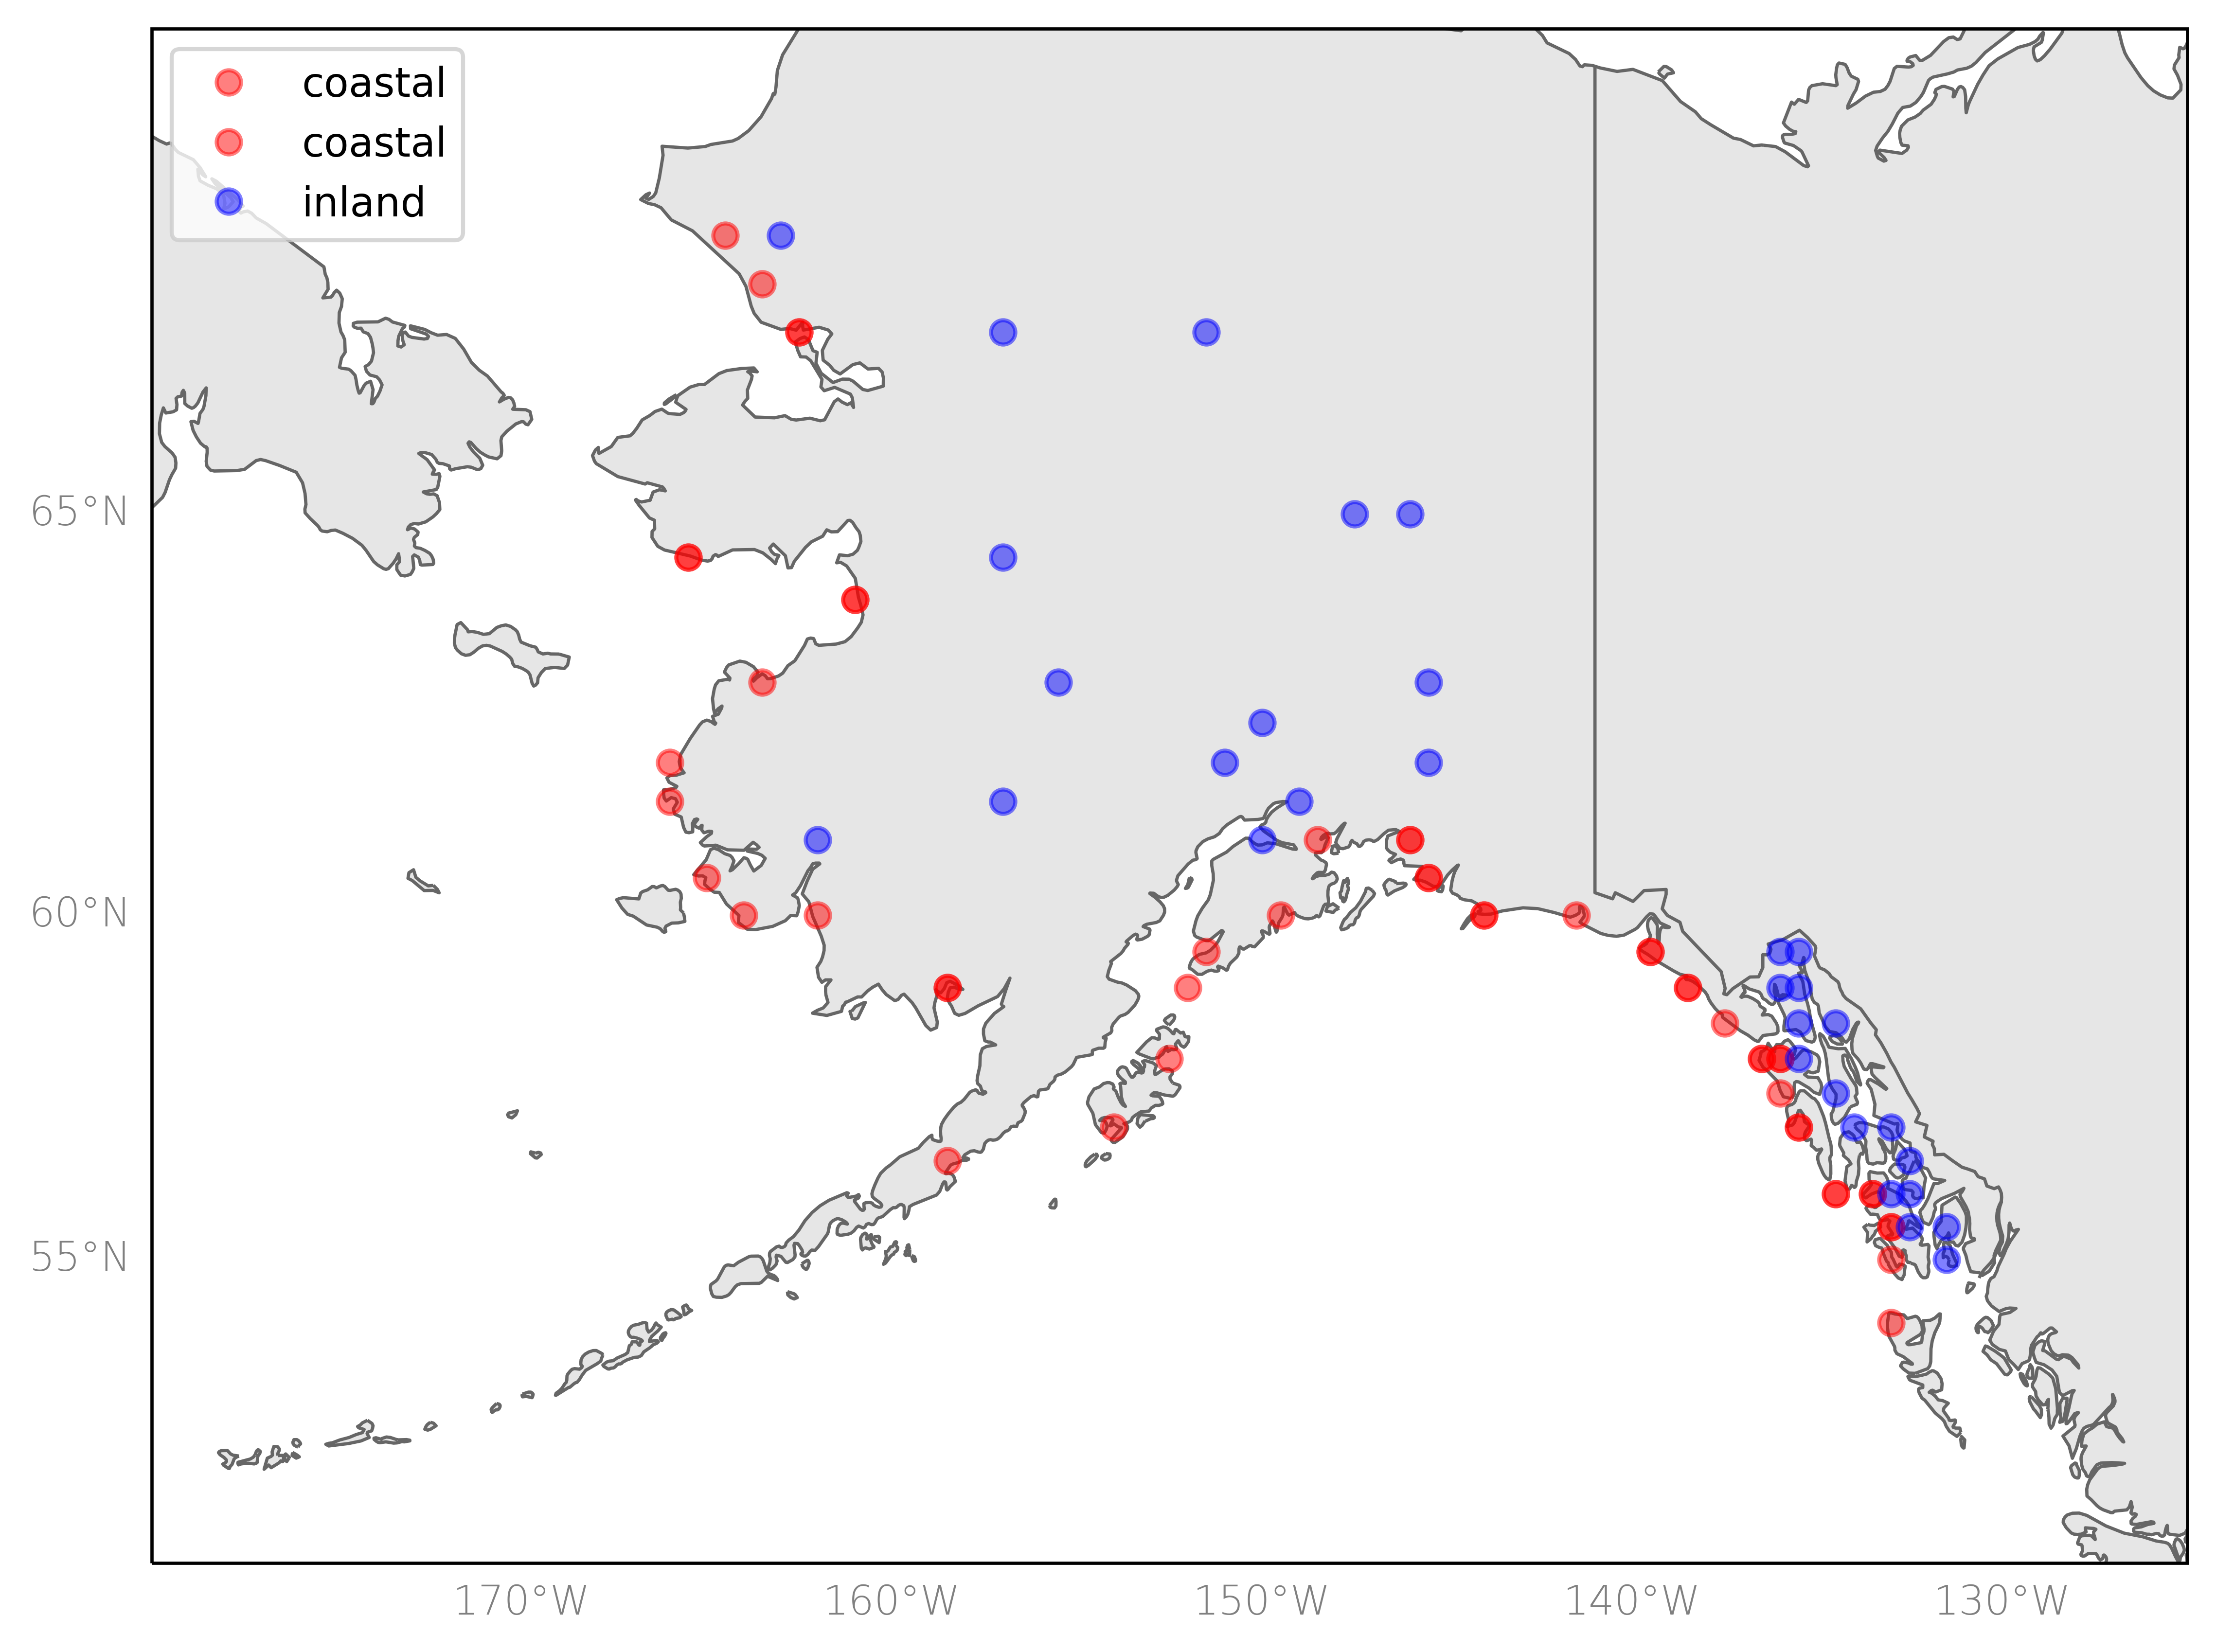

In [7]:
ext2 = [-175., -120., 40., 75.] # extent of AK
ext2 = [-180., -125., 50., 70.] # extent of AK

# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.Mercator() ## the projection you want your map displayed in

# Set tick/grid locations
tx = 10
ty = 5
dx = np.arange(ext2[0],ext2[1]+tx,tx)
dy = np.arange(ext2[2],ext2[3]+ty,ty)

fig = plt.figure(figsize=(9.0 ,9.0))
fig.dpi = 600
fname = path_to_figs + 'AK_map_ARtools_recommended'
fmt1 = 'svg'
fmt2='png'

ax = plt.axes(projection=ccrs.Mercator())
ax = draw_basemap(ax, extent=ext2, xticks=dx, yticks=dy,left_lats=True, right_lats=False)
ax.set_extent(ext2, ccrs.PlateCarree())

# need this to fix annotate transform
transform = datacrs._as_mpl_transform(ax)

## Add different points
colors = ['ro', 'ro', 'bo']
lbl_lst = ['coastal', 'coastal', 'inland']
for i, df in enumerate(df_lst):
    x = df['lon-round'].values*-1
    y = df['lat-round'].values
    ax.plot(x, y, colors[i], markersize=6, transform=datacrs, alpha=0.5, label=lbl_lst[i])
    
leg = ax.legend(loc='upper left', ncol=1)

fig.savefig('%s.%s' %(fname, fmt1), bbox_inches='tight', dpi=fig.dpi, transparent=True)
fig.savefig('%s.%s' %(fname, fmt2), bbox_inches='tight', dpi=fig.dpi, transparent=True)
plt.show()
fig.clf()


## Combine IVT plume coastal and AR coastal into one df

In [8]:
## drop inland latitude/longitude points
inland = df_lst[2].drop(['latitude', 'longitude'], axis=1) 

# fix up coastal points
coastal = pd.concat(df_lst[0:2])
print(len(coastal))
coastal = coastal.drop(['latitude', 'longitude'], axis=1) 
coastal = coastal.drop_duplicates(subset=None, keep="first", inplace=False)
coastal = coastal.reset_index()
coastal = coastal.drop(['index'], axis=1) 
coastal.sort_values(by=['lon-round'])

50


name  lon-round  lat-round
0   Langara Airport      133.0       54.0
27         Hydaburg      133.0       55.0
1             Craig      133.0       55.5
2          Edna Bay      133.5       56.0
3    Port Alexander      134.5       56.0
4             Sitka      135.5       57.0
5           Pelican      136.0       58.0
28          Klagbay      136.0       57.5
6        Elfin Cove      136.5       58.0
29       Lituya Bay      137.5       58.5
7           Dry Bay      138.5       59.0
8           Yakutat      139.5       59.5
30          Icy Bay      141.5       60.0
9     Cape Suckling      144.0       60.0
10          Cordova      145.5       60.5
11           Valdez      146.0       61.0
12         Whittier      148.5       61.0
13           Seward      149.5       60.0
31            Homer      151.5       59.5
14     Dog Fish Bay      152.0       59.0
15           Kodiak      152.5       58.0
16           Akhiok      154.0       57.0
32          Chignik      158.5       56.5
17       Dillingham      158.5       59.0
22       Unalakleet      161.0       64.0
18              Eek      162.0       60.0
24         Kotzebue      162.5       67.0
25           Kagvik      163.5       67.5
21           Kotlik      163.5       63.0
33           Kipnuk      164.0       60.0
26         Kivalina      164.5       68.0
19          Toksook      165.0       60.5
23             Nome      165.5       64.5
20           Hooper      166.0       61.5
34    Cape Romanzof      166.0       62.0

In [9]:
inland.sort_values(by=['lat-round'])

name  lon-round  lat-round
0   Metlakatla Airport      131.5       55.0
1            Ketchikan      131.5       55.5
2               Kasaan      132.5       55.5
3           Thorne Bay      132.5       56.0
4         Coffman Cove      133.0       56.0
5     Wrangell Airport      132.5       56.5
6   Petersburg Airport      133.0       57.0
7         Kake Airport      134.0       57.0
8               Angoon      134.5       57.5
9       Hoonah Airport      135.5       58.0
10      Juneau Airport      134.5       58.5
11    Gustavus Airport      135.5       58.5
12        Nunatak Cove      136.0       59.0
13              Haines      135.5       59.0
30             Klukwan      136.0       59.5
14     Skagway Airport      135.5       59.5
18           Anchorage      150.0       61.0
22              Bethel      162.0       61.0
17             Hatcher      149.0       61.5
21           Sleetmute      157.0       61.5
19             Skentna      151.0       62.0
15          Glennallen      145.5       62.0
20           Talkeetna      150.0       62.5
16              Paxson      145.5       63.0
27             McGrath      155.5       63.0
24              Galena      157.0       64.5
23           Fairbanks      147.5       65.0
26              Munson      146.0       65.0
25             Bettles      151.5       67.0
28               Kobuk      157.0       67.0
29             Red Dog      163.0       68.0

In [10]:
ext2 = [-175., -120., 40., 75.] # extent of AK
ext2 = [-180., -125., 50., 70.] # extent of AK

# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.Mercator() ## the projection you want your map displayed in

# Set tick/grid locations
tx = 10
ty = 5
dx = np.arange(ext2[0],ext2[1]+tx,tx)
dy = np.arange(ext2[2],ext2[3]+ty,ty)

fig = plt.figure(figsize=(9.0 ,9.0))
fig.dpi = 600
fname = path_to_figs + 'AK_map_ARtools_recommended'
fmt1 = 'svg'
fmt2='png'

ax = plt.axes(projection=ccrs.Mercator())
ax = draw_basemap(ax, extent=ext2, xticks=dx, yticks=dy,left_lats=True, right_lats=False)
ax.set_extent(ext2, ccrs.PlateCarree())

# need this to fix annotate transform
transform = datacrs._as_mpl_transform(ax)

## Add different points
colors = ['ro', 'bo']
lbl_lst = ['coastal', 'inland']
df_lst = [coastal, inland]
for i, df in enumerate(df_lst):
    x = df['lon-round'].values*-1
    y = df['lat-round'].values
    ax.plot(x, y, colors[i], markersize=6, transform=datacrs, alpha=0.5, label=lbl_lst[i])
    
leg = ax.legend(loc='upper left', ncol=1)

fig.savefig('%s.%s' %(fname, fmt1), bbox_inches='tight', dpi=fig.dpi, transparent=True)
fig.savefig('%s.%s' %(fname, fmt2), bbox_inches='tight', dpi=fig.dpi, transparent=True)
plt.show()
fig.clf()


In [11]:
## write to csv
coastal.to_csv(path_to_out + 'AK_coastal_points.csv')
inland.to_csv(path_to_out + 'AK_inland_points.csv')